<a href="https://colab.research.google.com/github/profliuhao/CSIT359/blob/main/CSIT359_class6_note_table_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# only run once
!git clone https://github.com/profliuhao/CSIT359.git

Cloning into 'CSIT359'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 81 (delta 30), reused 48 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 4.09 MiB | 7.20 MiB/s, done.
Resolving deltas: 100% (30/30), done.


# Data Viz with matplotlib Series 1: Bar chart

## Reference

- Bar chart
    <https://en.wikipedia.org/wiki/Bar_chart>
- What to consider when creating stacked column charts
    <https://blog.datawrapper.de/stacked-column-charts>
- Horizontal bar chart
    <https://datavizproject.com/data-type/bar-chart-horizontal/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Bar chart
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

### When to use it ?

- Compare **categorical data**.
- Comparisons among **discrete categories**.
- One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

### Example

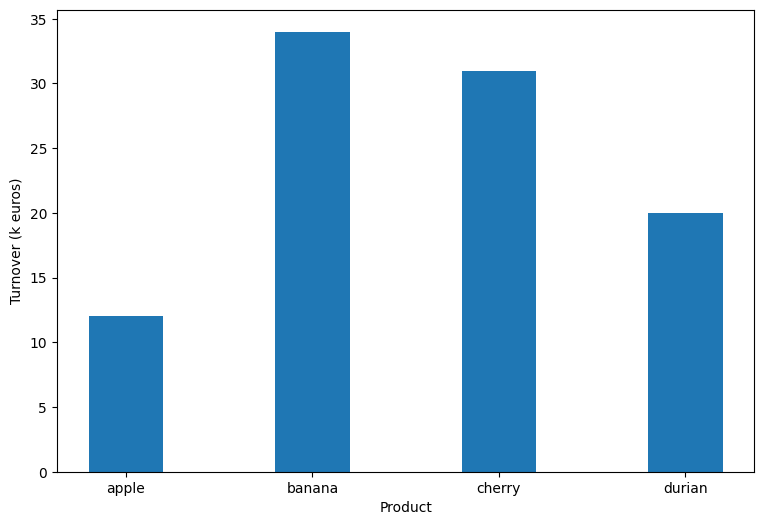

In [ ]:
plt.figure(figsize=(9, 6))

x = np.arange(4)
turnover_k_euros = [12, 34, 31, 20]

plt.bar(x, turnover_k_euros, width=0.4)
plt.xticks(np.arange(4), ('apple', 'banana', 'cherry', 'durian'))
plt.xlabel('Product')
plt.ylabel('Turnover (k euros)')

plt.show()

This plot describes turnovers(k euros) for each fruit. Among four fruits, bananas' sales bring the largest turnover (34k euros), however, it seems that consumers don't like apple that much.

## Grouped bar chart
Bar graphs can also be used for more complex comparisons of data with grouped bar charts and stacked bar charts. In a grouped bar chart, for each categorical group there are two or more bars. These bars are color-coded to represent a particular grouping.

### When to use it ?

To represent and compare **different categories of two or more groups**.

### Example

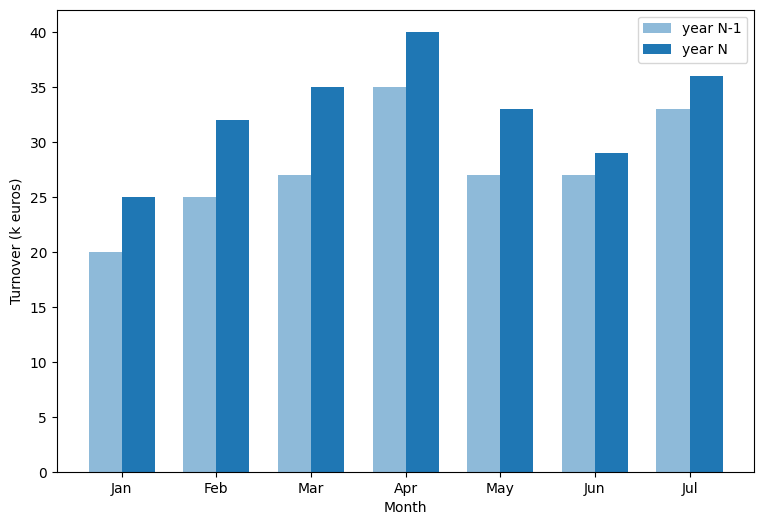

In [ ]:
year_n_1 = (20, 25, 27, 35, 27, 27, 33)
year_n = (25, 32, 35, 40, 33, 29, 36)

ind = np.arange(7)
width = 0.35

fig, ax = plt.subplots(figsize=(9, 6))
rects1 = ax.bar(ind - width / 2, year_n_1, width, color='#1f77b4', alpha=0.5)
rects2 = ax.bar(ind + width / 2, year_n, width, color='#1f77b4')

plt.xticks(np.arange(7), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'))
plt.xlabel('Month')
plt.ylabel('Turnover (k euros)')
plt.legend((rects1[0], rects2[0]), ('year N-1', 'year N'))

plt.show()

This plot compares monthly turnover of year N to year N-1. Except for April and May, monthly turnover in year N is higher than year N-1. In the case of retailing, this kind of changes can be explained like the strategy of year N works well, or new products attract clients, or new stores of year N contribute to the turnover.

## Stacked bar chart
Alternatively, a stacked bar chart could be used. The stacked bar chart stacks bars that represent different groups on top of each other. The height of the resulting bar shows the combined result of the groups.

### When to use it ?

- To compare the **totals** and **one part of the totals**.
- If the total of your parts is crucial, stacked column chart can work well for dates.

### Example

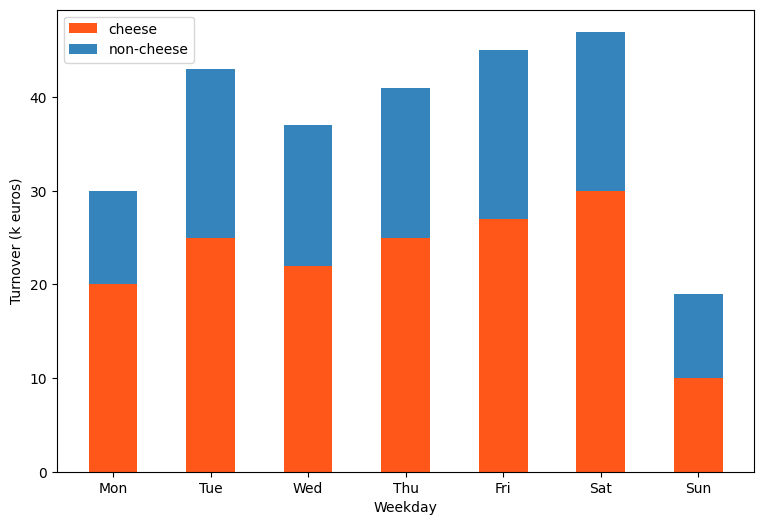

In [ ]:
plt.figure(figsize=(9, 6))

cheese = (20, 25, 22, 25, 27, 30, 10)
non_cheese = (10, 18, 15, 16, 18, 17, 9)

rect1 = plt.bar(np.arange(7), cheese, width=0.5, color='orangered', alpha=0.9)
rect2 = plt.bar(np.arange(7), non_cheese, bottom=cheese, width=0.5, color='#1f77b4', alpha=0.9)

plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Weekday')
plt.ylabel('Turnover (k euros)')
plt.legend((rect1[0], rect2[0]), ('cheese', 'non-cheese'))

plt.show()

This plot presents weekdays' turnover with cheese and non-cheese products' sales. Globally, the sales of cheese products are much more than others.

## Horizontal bar chart

The horizontal bar chart is the same as a vertical bar chart only the x-axis and y-axis are switched.

### When to use it ?

- You need more room to fit text labels for categorical variables.
- When you work with a big dataset, horizontal bar charts tend to work better in a narrow layout such as mobile view.

### Example

In [ ]:
df = pd.DataFrame({'product': ['grill', 'cheese', 'red wine', 'salade', 'chicken', 'sushi', 'pizza', 'soup'],
                   'turnover': [846, 739, 639, 593, 572, 493, 428, 293]},
                  columns=['product', 'turnover'])
df.sort_values('turnover', inplace=True)
df.reset_index(inplace=True, drop=True)
df

,product,turnover
0,soup,293
1,pizza,428
2,sushi,493
3,chicken,572
4,salade,593
5,red wine,639
6,cheese,739
7,grill,846


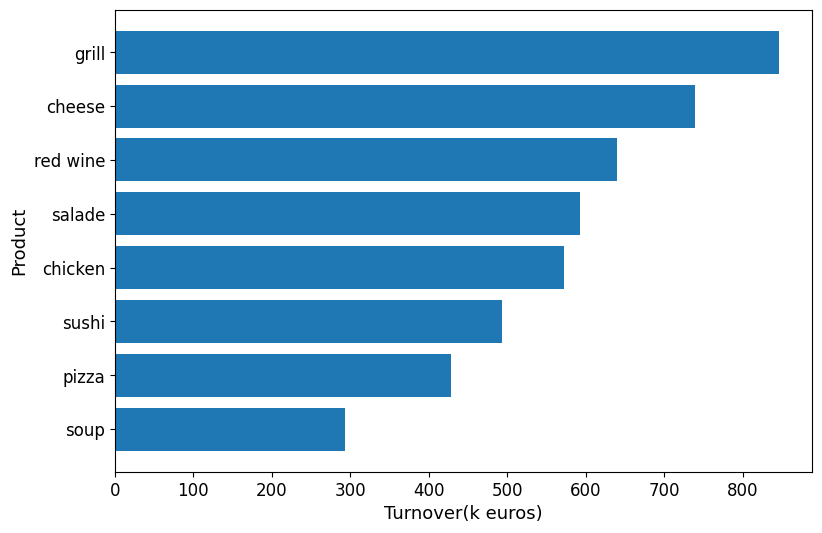

In [ ]:
plt.figure(figsize=(9, 6))

plt.barh(np.arange(len(df['product'])), df['turnover'], align='center')
plt.yticks(np.arange(len(df['product'])), df['product'])
plt.tick_params(labelsize=12)
plt.xlabel('Turnover(k euros)', fontdict={'fontsize': 13})
plt.ylabel('Product', fontdict={'fontsize': 13})

plt.show()

This vertical bar chart describes clearly turnover for each product. Obviously, grill product is prefered by clients.

# Data Viz with matplotlib Series 2: Line chart

## Reference

- Line chart:
    <https://en.wikipedia.org/wiki/Line_chart>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Line chart
A line chart or line graph is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments. A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically.

### When to use it ?

- Track changes over time
- x-axis displays continuous variables
- Y-axis displays measurement

### Example

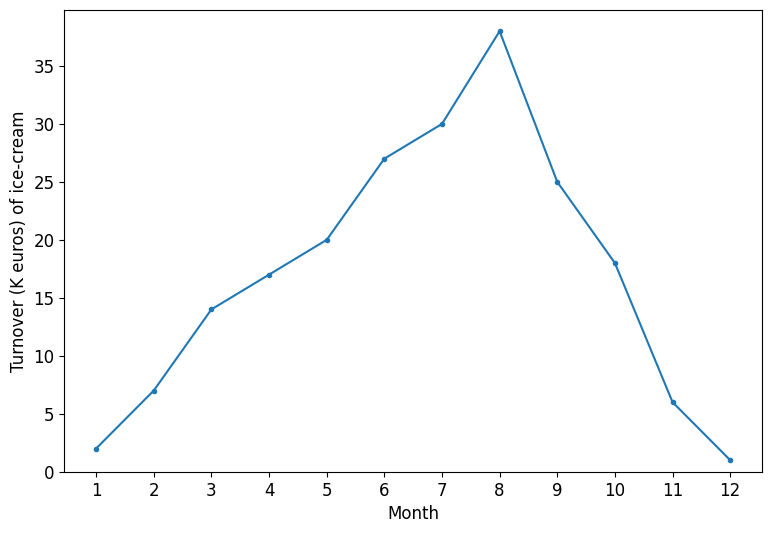

In [ ]:
plt.figure(figsize=(9, 6))

turnover = [2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]
plt.plot(np.arange(12), turnover, marker='.')

plt.tick_params(labelsize=12)
plt.xticks(np.arange(12), np.arange(1,13))
plt.xlabel('Month', size=12)
plt.ylabel('Turnover (K euros) of ice-cream', size=12)
plt.ylim(bottom=0)

plt.show()

Suppose that the plot above describes the turnover(k euros) of ice-cream's sales during one year. According to the plot, we can clearly find that the sales reach a peak in summer, then fall from autumn to winter, which is logical.

## Line chart with multiple lines

### When to use it ?

Compare different subjects during the same period.

### Example

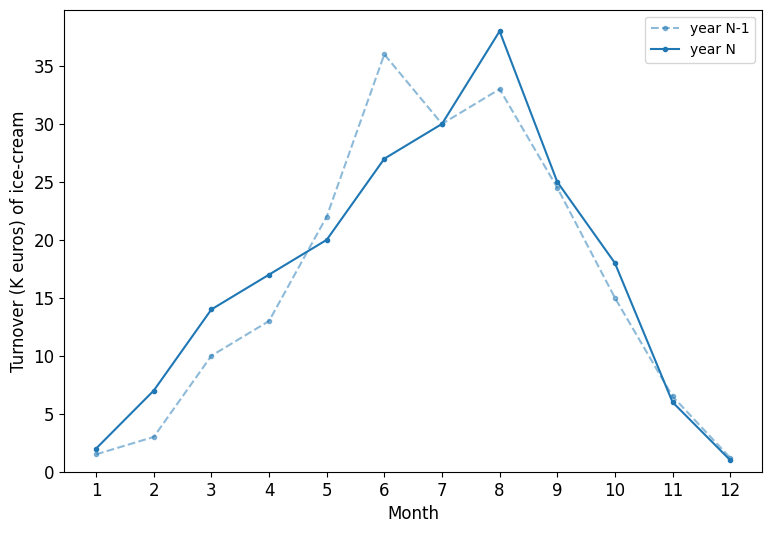

In [ ]:
plt.figure(figsize=(9, 6))

year_n_1 = [1.5, 3, 10, 13, 22, 36, 30, 33, 24.5, 15, 6.5, 1.2]
year_n = [2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]

plt.plot(np.arange(12), year_n_1, marker='.', color='#1f77b4', label='year N-1', linestyle='--', alpha=0.5)
plt.plot(np.arange(12), year_n, marker='.', color='#1f77b4', label='year N')

plt.tick_params(labelsize=12)
plt.xticks(np.arange(12), np.arange(1,13))
plt.xlabel('Month', size=12)
plt.ylabel('Turnover (K euros) of ice-cream', size=12)
plt.ylim(bottom=0)
plt.legend()

plt.show()

As an extension of the first plot, the second one compares two-year turnover together. The peak for both year is in the summer, for year N, the peak is in August; however, the peak is reached in June in the year N-1, which is caused by the heatwave in June.

## Add values' label on the plot

We find that there is no parameter for add values' labels by plt.plot(), but we can add them with text() function.

In [ ]:
def autolabel_simple_lineplot_mille_wk(df, col_name, lines_color):
    for i, val in enumerate(df[col_name]):
        plt.text(df.index[i]-0.15,
                 val+1.7,
                 '%1.0f€' % val,
                 color=lines_color,
                 rotation=10,
                 fontsize=11)

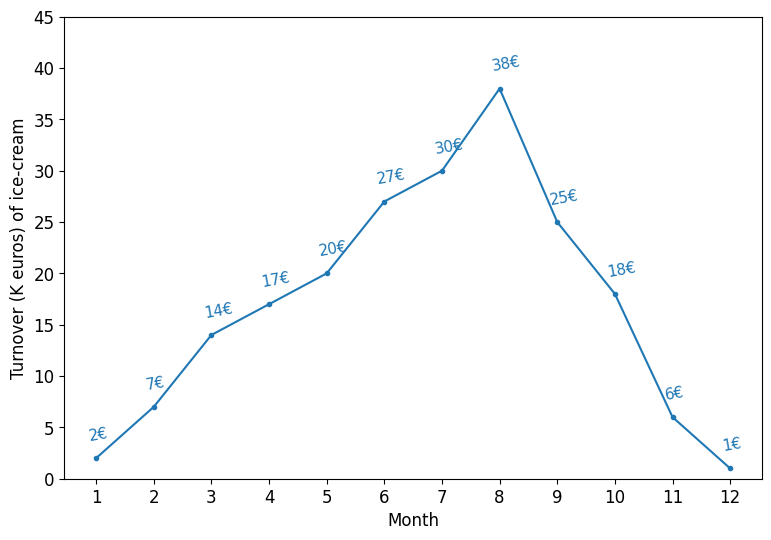

In [ ]:
df = pd.DataFrame({'turnover':[2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]})

plt.figure(figsize=(9, 6))

turnover = [2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]
plt.plot(df.index, df.turnover, marker='.')

plt.tick_params(labelsize=12)
plt.xticks(df.index, np.arange(1, 13))
plt.xlabel('Month', size=12)
plt.ylabel('Turnover (K euros) of ice-cream', size=12)
plt.ylim(bottom=0, top=max(df.turnover)+7)
autolabel_simple_lineplot_mille_wk(df, 'turnover', '#1f77b4')

plt.show()

# Data Viz with matplotlib Series 3: Pie chart

## Reference

- Pie chart:
    <https://en.wikipedia.org/wiki/Pie_chart>
- Nested pie chart:
    <https://www.zingchart.com/docs/chart-types/nested-pie-chart>
- Multi-level Pie Chart
    <https://www.fusioncharts.com/dev/chart-guide/standard-charts/multi-level-pie-chart>

In [ ]:
import matplotlib.pyplot as plt

## Pie chart
A pie chart (or a circle chart) is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area), is proportional to the quantity it represents.

### When to use it ?

- Show percentage or proportional data.
- Less than 7 categories.
- Display data that is classified into nominal or ordinal categories.
- Try to use positive values.

### Example

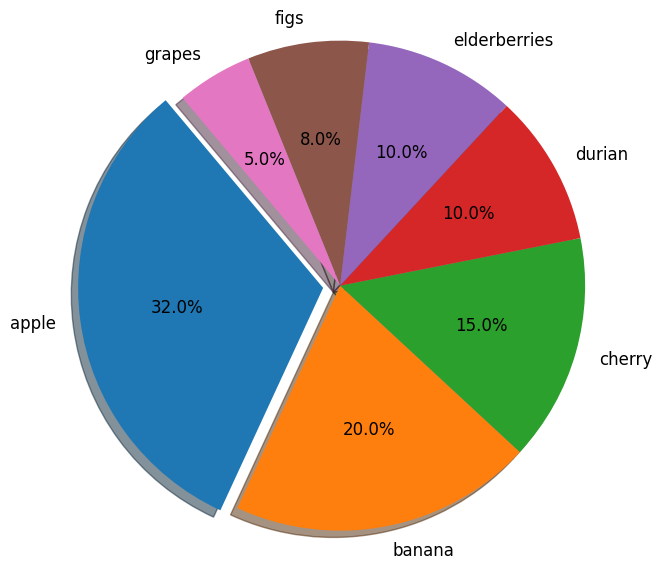

In [ ]:
plt.figure(figsize=(7, 7))

labels = 'apple', 'banana', 'cherry', 'durian', 'elderberries', 'figs', 'grapes'
sizes = [32, 20, 15, 10, 10, 8, 5]

p = plt.pie(sizes, labels=labels, explode=(0.07, 0, 0, 0, 0, 0, 0),
            autopct='%1.1f%%', startangle=130, shadow=True)
plt.axis('equal')

for i, (apple, banana, cherry, durian, elderberries, figs, grapes) in enumerate(p):
    if i > 0:
        apple.set_fontsize(12)
        banana.set_fontsize(12)
        cherry.set_fontsize(12)
        durian.set_fontsize(12)
        elderberries.set_fontsize(12)
        figs.set_fontsize(12)
        grapes.set_fontsize(12)

plt.show()

This pie chart describes the turnovers' percentage for each fruit. Sales of apple bring the most turnover among 7 fruits, who presents 32% of turnover. If the values represent volume instead of turnover, then we should prepare more apples than other fruits in the store.

## Donut chart
A donut chart is a variant of the pie chart, with a blank center allowing for additional information about the data as a whole to be included. This type of circular graph can support multiple statistics at once and it provides a better data intensity ratio to standard pie charts. It does not have to contain information in the center.

### Example

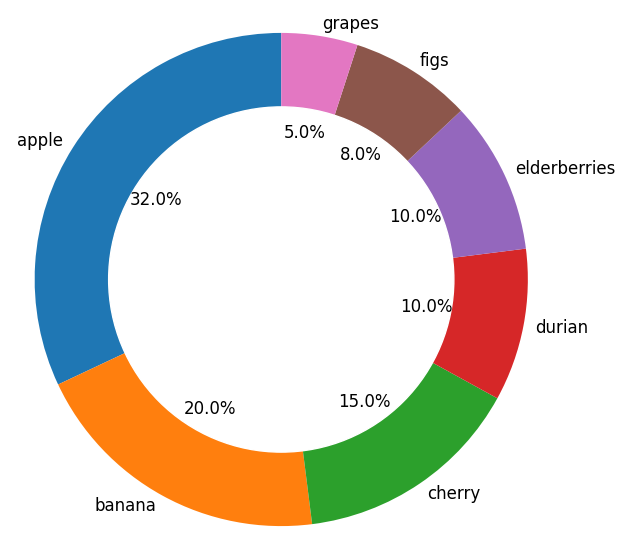

In [ ]:
plt.figure(figsize=(7, 7))

labels = 'apple', 'banana', 'cherry', 'durian', 'elderberries', 'figs', 'grapes'
sizes = [32, 20, 15, 10, 10, 8, 5]
my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.05)
plt.axis('equal')
plt.gca().add_artist(my_circle)

for i, (apple, banana, cherry, durian, elderberries, figs, grapes) in enumerate(d):
    if i > 0:
        apple.set_fontsize(12)
        banana.set_fontsize(12)
        cherry.set_fontsize(12)
        durian.set_fontsize(12)
        elderberries.set_fontsize(12)
        figs.set_fontsize(12)
        grapes.set_fontsize(12)

plt.show()

Extracly the same implication as the pie chart above.

## Nested pie chart
A nested pie chart or multi-level pie chart allows you to incorporate multiple levels or layers into your pie. Nested pies are a module variation on our standard pie chart type.

### When to use it ?

- Show symmetrical and asymmetrical tree structures in a consolidated pie-like structure.
- Multi-tiered data presentation, e.g., keyword analysis
- Inter-linked tree data, e.g., friends of friends

### Example

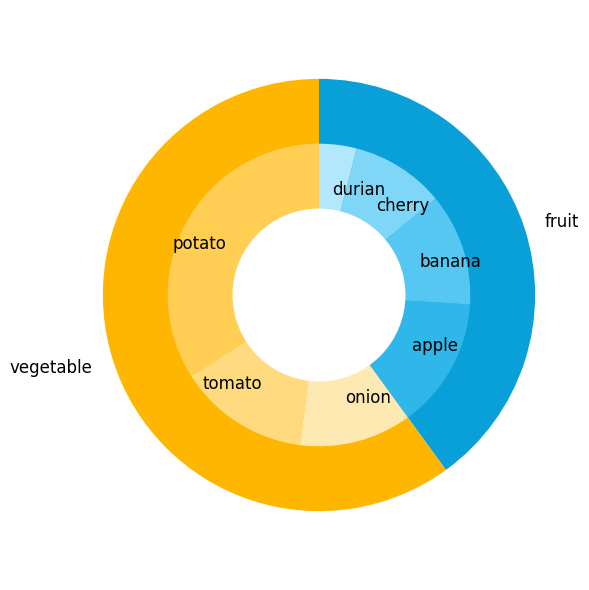

In [ ]:
plt.figure(figsize=(6, 6))

labels = ['vegetable', 'fruit']
sizes = [300, 200]
labels_vegefruit = ['potato', 'tomato', 'onion', 'apple', 'banana', 'cherry', 'durian']
sizes_vegefruit = [170, 70, 60, 70, 60, 50, 20]
colors = ['#FFB600', '#09A0DA']
colors_vegefruit = ['#FFCE53', '#FFDA7E', '#FFE9B2', '#30B7EA', '#56C7F2','#7FD6F7', '#B3E7FB']

bigger = plt.pie(sizes, labels=labels, colors=colors, startangle=90, frame=True)
smaller = plt.pie(sizes_vegefruit, labels=labels_vegefruit, colors=colors_vegefruit,
        radius=0.7, startangle=90, labeldistance=0.7)
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for i, (vegetable, fruit) in enumerate(bigger):
    if i > 0:
        vegetable.set_fontsize(12)
        fruit.set_fontsize(12)

for j, (potato, tomato, onion, apple, banana, cherry, durian) in enumerate(smaller):
    if j > 0:
        potato.set_fontsize(12)
        tomato.set_fontsize(12)
        onion.set_fontsize(12)
        apple.set_fontsize(12)
        banana.set_fontsize(12)
        cherry.set_fontsize(12)
        durian.set_fontsize(12)

plt.axis('equal')
plt.tight_layout()

plt.show()

This chart specifies a second level for consommation of vegetable and fruit, respectively. In general, vegetable is more consummed than fruit. Among 3 vegetables, potato is much more popular than others; among 4 fruits, apple is the most sold. Thus, for the retailers, they need to prepare more potatoes and apples than other vegetables and fruits.

# Data Viz with matplotlib Series 4: Scatter plot

## Reference
- Scatter plot
    <https://en.wikipedia.org/wiki/Scatter_plot>
- When to use a scatter plot?
    <https://chartio.com/learn/dashboards-and-charts/what-is-a-scatter-plot>
- Connected scatter plot
    <https://vega.github.io/vega/examples/connected-scatter-plot>
- The Connected Scatterplot for Presenting Paired Time Series
    <https://research.tableau.com/sites/default/files/Haroz-TVCG-2016.pdf>
- Bubble chart
    <https://en.wikipedia.org/wiki/Bubble_chart>
- Effective Use of Bubble Charts
    <https://msktc.org/lib/docs/KT_Toolkit/Charts_and_Graphs/Charts_Tool_Bubble_508c.pdf>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Scatter plot

A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

### When to use it ?

Scatter plots are used when you want to show the **relationship between two variables**. Scatter plots are sometimes called correlation plots because they show how two variables are correlated.

### Example 1

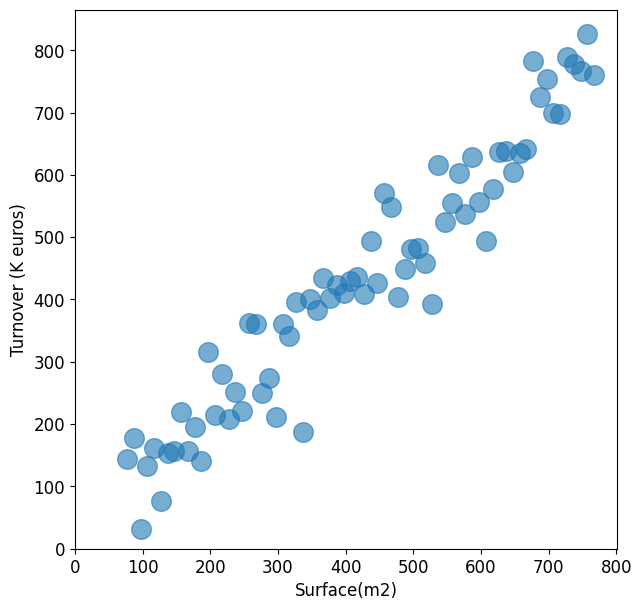

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(x=range(77, 770, 10), y=np.random.randn(70)*55+range(77, 770, 10),
            s=200,
            alpha=0.6)
plt.tick_params(labelsize=12)
plt.xlabel('Surface(m2)', size=12)
plt.ylabel('Turnover (K euros)', size=12)
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

This plot describes the positive relation between store's surface and its turnover(k euros), which is reasonable: for stores, the larger it is, more clients it can accept, more turnover it will generate.

### Example 2

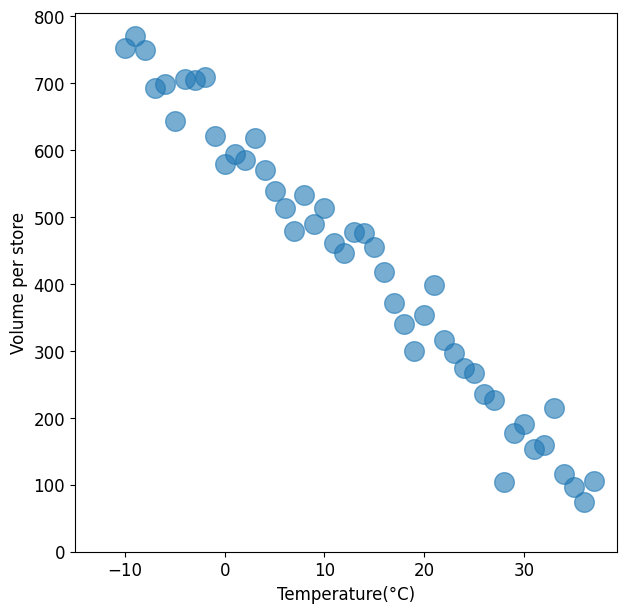

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(x=range(-10, 38, 1), y=range(770, 60, -15)-np.random.randn(48)*40,
            s=200,
            alpha=0.6)
plt.tick_params(labelsize=12)
plt.xlabel('Temperature(°C)', size=12)
plt.ylabel('Volume per store', size=12)
plt.xlim(left=-15)
plt.ylim(bottom=0)

plt.show()

This chart displays a negative relation between two variables: temperature and average volume of hot soup. When it gets colder, people need to drink something hot to keep them warmer, however, when it becomes hotter, the needs of hot soup decreases.

### Example 3

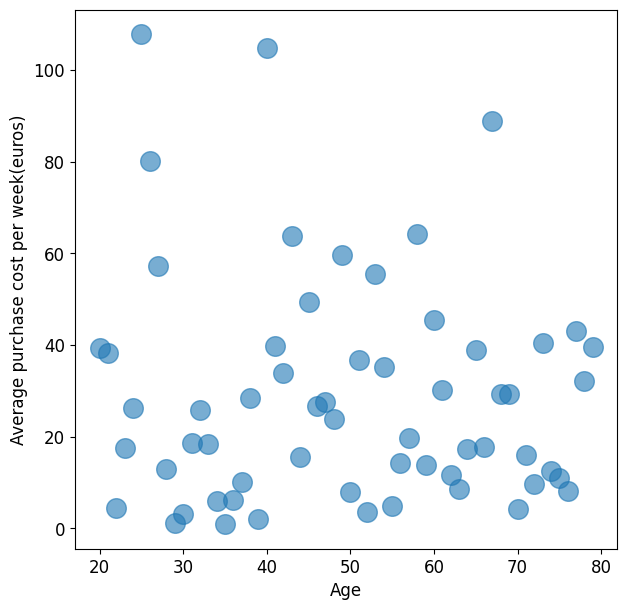

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(x=range(20, 80, 1), y=np.abs(np.random.randn(60)*40),
            s=200,
            alpha=0.6)
plt.tick_params(labelsize=12)
plt.xlabel('Age', size=12)
plt.ylabel('Average purchase cost per week(euros)', size=12)

plt.show()

This plot shows that there is no relation between client's age and their purchase cost per week. Thus, we shouldn't study their relationship for this case.

## Connected scatter plot

A connected scatter plot is a mix between scatter plot and line chart, it uses line segments to connect consecutive scatter plot points, for example to illustrate trajectories over time.

### When to use it ?

The connected scatterplot visualizes **two related time series** in a scatterplot and connects the points with a line in temporal sequence.

### Example

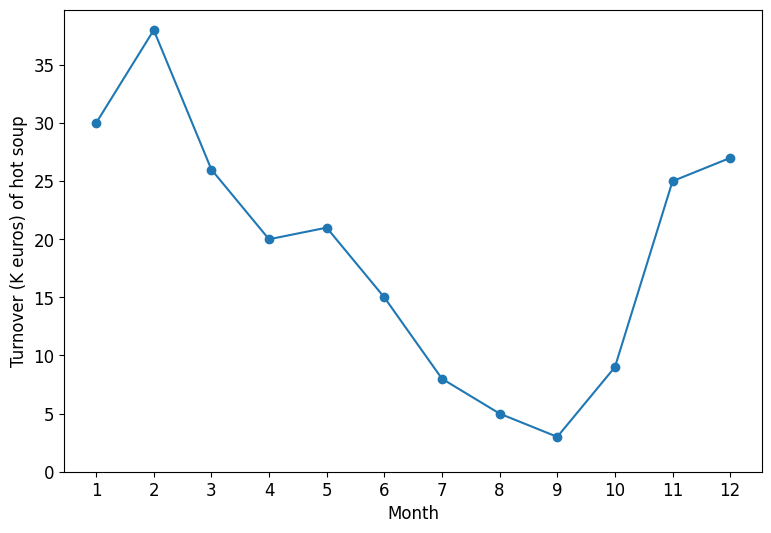

In [ ]:
plt.figure(figsize=(9, 6))

turnover = [30, 38, 26, 20, 21, 15, 8, 5, 3, 9, 25, 27]

plt.plot(np.arange(12), turnover, marker='o')

plt.tick_params(labelsize=12)
plt.xticks(np.arange(12), np.arange(1,13))
plt.xlabel('Month', size=12)
plt.ylabel('Turnover (K euros) of hot soup', size=12)
plt.ylim(bottom=0)

plt.show()

Suppose that the plot above describes the turnover(k euros) of hot soup's sales during one year. According to the plot, we can clearly find that the sales reach a peak in winter, then fall from spring to summer, which is logical.

## Bubble chart

A bubble chart is a type of chart that displays three dimensions of data, the value of an additional variable is represented through the size of the dots.

### When to use it ?

For conveying information regarding a **third data element** per observation.

### Example

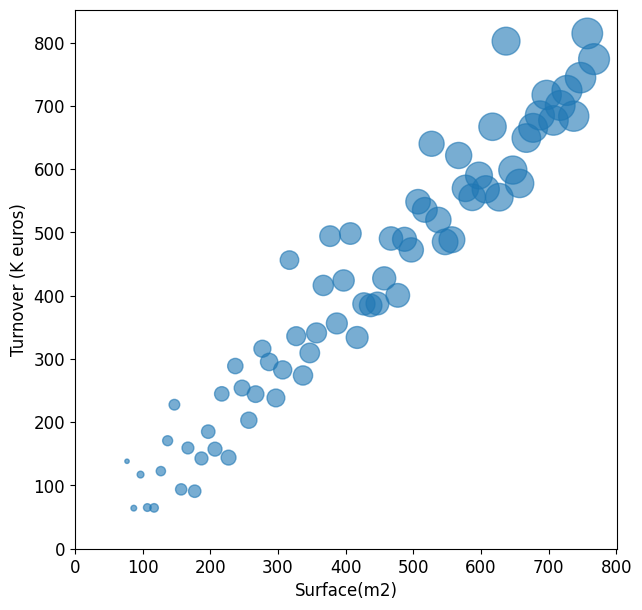

In [ ]:
nbclients = range(10, 494, 7)
plt.figure(figsize=(7, 7))

plt.scatter(x=range(77, 770, 10), y=np.random.randn(70)*55+range(77, 770, 10),
            s=nbclients, alpha=0.6)
plt.tick_params(labelsize=12)
plt.xlabel('Surface(m2)', size=12)
plt.ylabel('Turnover (K euros)', size=12)
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

Since I added number of clients as size of each point, which corresponds the explication of the first plot.

## Scatter plot with different colors

Scatter plot which created by matplotlib, cannot specify colors in terms of category variable's value. So we have to overlap plots of different colors.

### Example 1

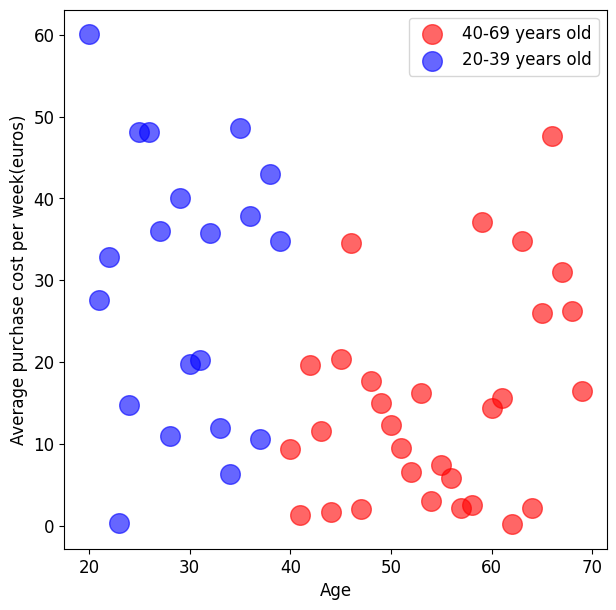

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(x=range(40, 70, 1), y=np.abs(np.random.randn(30)*20),
            s=200,
            alpha=0.6,
            label='40-69 years old',
            c='red')
plt.scatter(x=range(20, 40, 1), y=np.abs(np.random.randn(20)*40),
            s=200,
            alpha=0.6,
            label='20-39 years old',
            c='blue')

plt.tick_params(labelsize=12)
plt.xlabel('Age', size=12)
plt.ylabel('Average purchase cost per week(euros)', size=12)
plt.legend(fontsize=12)

plt.show()

This 2-color scatter plot displays clearly the difference of weekly purchase cost between young people and middle aged or elderly people: average weekly purchase of younger people is nealy once more than middle aged or elderly people.

### Example 2

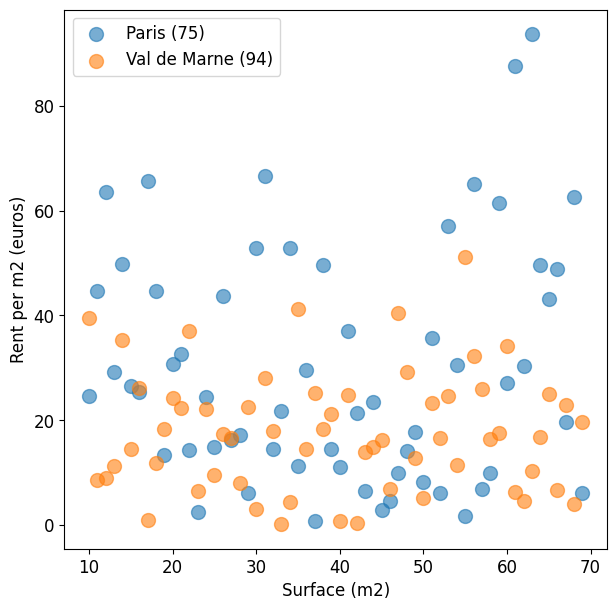

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(x=range(10, 70, 1), y=np.abs(np.random.randn(60)*40),
            s=100,
            alpha=0.6,
            label='Paris (75)')
plt.scatter(x=range(10, 70, 1), y=np.abs(np.random.randn(60)*20),
            s=100,
            alpha=0.6,
            label='Val de Marne (94)')

plt.tick_params(labelsize=12)
plt.xlabel('Surface (m2)', size=12)
plt.ylabel('Rent per m2 (euros)', size=12)
plt.legend(fontsize=12)

plt.show()

In this plot, some points are overlapped, which will impact our analysis. In this case, it's better to separate samples of "Paris (75)" and "Val de Marne (94)" into 2 plot:

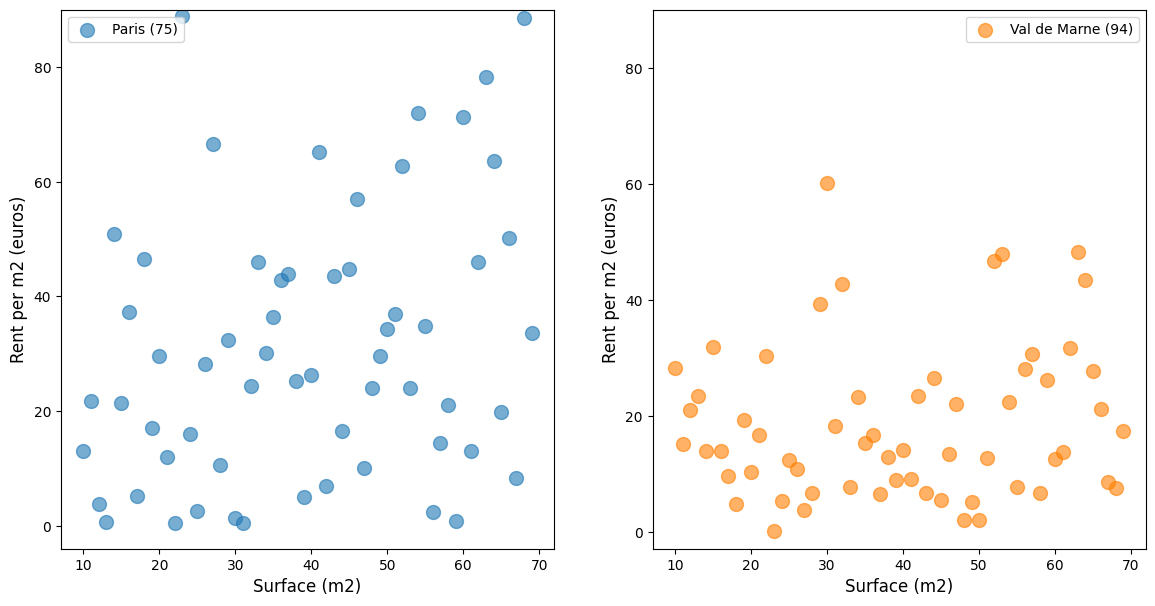

In [ ]:
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

axarr[0].scatter(x=range(10, 70, 1),
                 y=np.abs(np.random.randn(60)*40),
                 s=100,
                 alpha=0.6,
                 label='Paris (75)')
axarr[1].scatter(x=range(10, 70, 1),
                 y=np.abs(np.random.randn(60)*20),
                 s=100,
                 alpha=0.6,
                 label='Val de Marne (94)',
                 color='#ff7f01')

axarr[0].set_xlabel('Surface (m2)', size=12)
axarr[0].set_ylabel('Rent per m2 (euros)', size=12)
axarr[0].set_ylim(top = 90)
axarr[0].legend()

axarr[1].set_xlabel('Surface (m2)', size=12)
axarr[1].set_ylabel('Rent per m2 (euros)', size=12)
axarr[1].set_ylim(top = 90)
axarr[1].legend()

plt.show()

Comparing to the first plot of this example, the graphs above are more clearer and explicable. The rent price per m2 of Val de Marne is almost half of the rent price / m2 of Paris.

# Data Viz with matplotlib Series 5: Treemap

## Reference

- Treemapping:
    <https://en.wikipedia.org/wiki/Treemapping>

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

## Treemap
Treemaps display hierarchical (tree-structured) data as a set of nested rectangles. Each branch of the tree is given a rectangle, which is then tiled with smaller rectangles representing sub-branches. A leaf node's rectangle has an area proportional to a specified dimension of the data. Often the leaf nodes are colored to show a separate dimension of the data.

### When to use it ?

- Less than 10 branches
- Positive values
- Space for visualisation is limited.

### Example

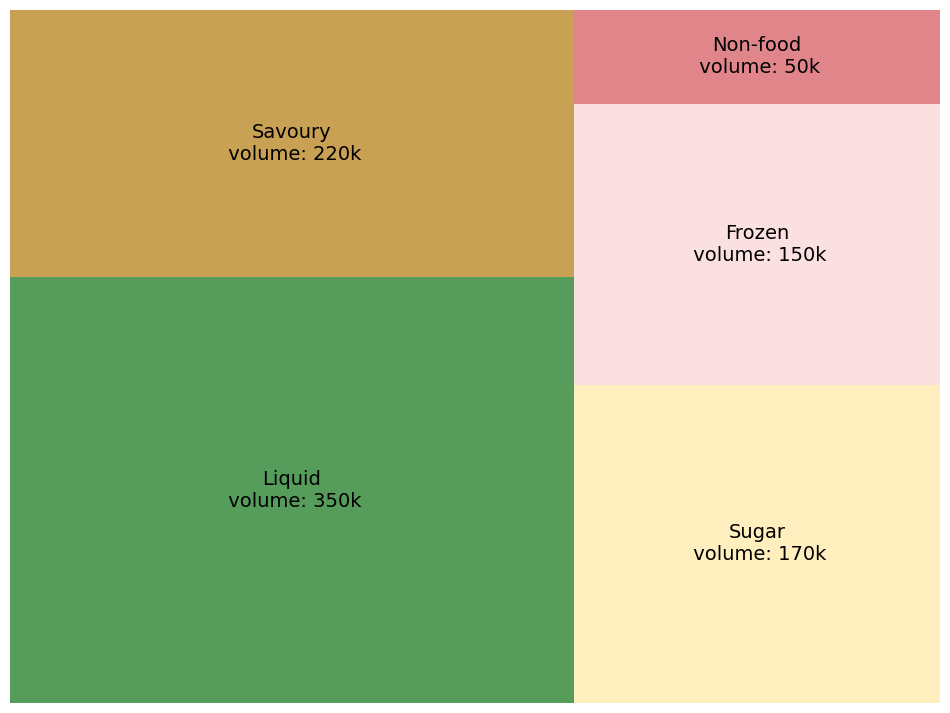

In [ ]:
plt.figure(figsize=(12, 9))

volume = [350, 220, 170, 150, 50]
labels = ['Liquid\n volume: 350k', 'Savoury\n volume: 220k', 'Sugar\n volume: 170k',
          'Frozen\n volume: 150k', 'Non-food\n volume: 50k']
color_list = ['#0f7216', '#b2790c', '#ffe9a3', '#f9d4d4', '#d35158', '#ea3033']

plt.rc('font', size=14)
squarify.plot(sizes=volume, label=labels,
              color=color_list, alpha=0.7)
plt.axis('off')

plt.show()

This treemap describes volume for each product universe with corresponding surface. Liquid products are more sold than others. If you want to explore more, we can go into products "liquid" and find which shelves are prefered by clients.

### Counter-example

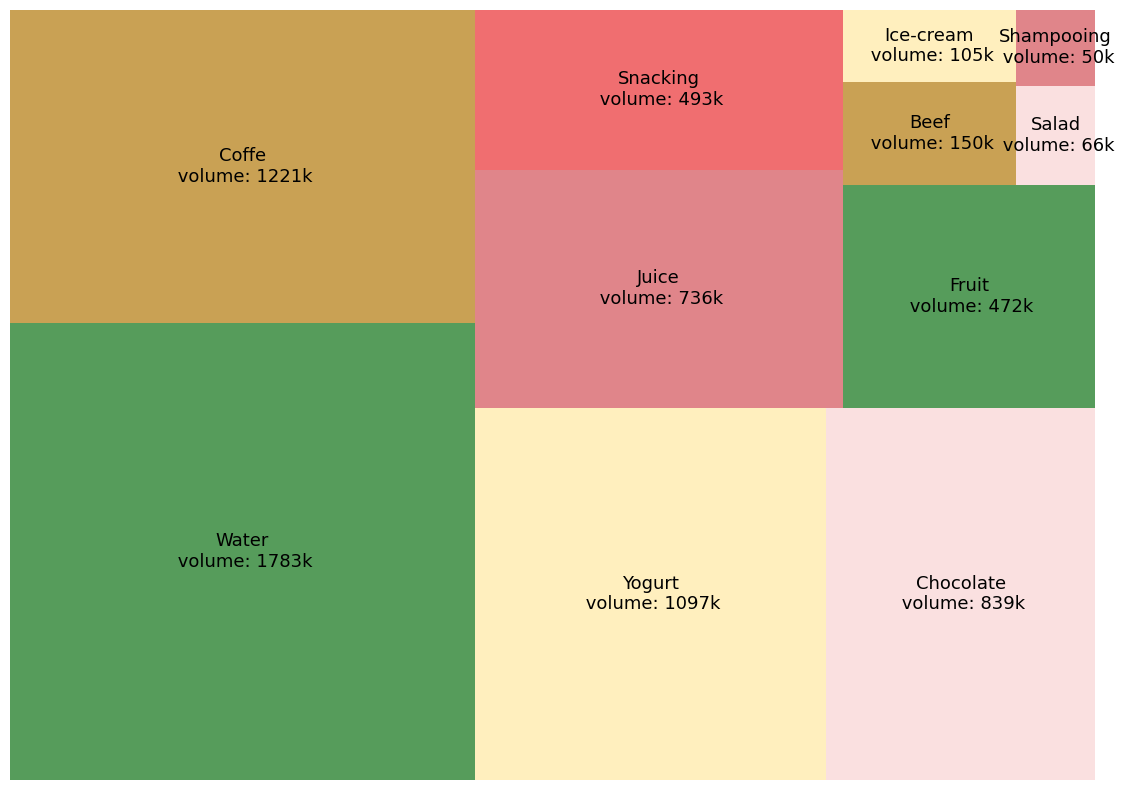

In [ ]:
plt.figure(figsize=(14, 10))

volume = [1783, 1221, 1097, 839, 736, 493,
          472, 150, 105, 66, 50]
labels = ['Water\n volume: 1783k',
          'Coffe\n volume: 1221k',
          'Yogurt\n volume: 1097k',
          'Chocolate\n volume: 839k',
          'Juice\n volume: 736k',
          'Snacking\n volume: 493k',
          'Fruit\n volume: 472k',
          'Beef\n volume: 150k',
          'Ice-cream\n volume: 105k',
          'Salad\n volume: 66k',
          'Shampooing\n volume: 50k']


plt.rc('font', size=13)
squarify.plot(sizes=volume, label=labels,
              color=color_list, alpha=0.7)
plt.axis('off')

plt.show()

This example shows the reason why a treemap should have less than 10 branches. In the plot above, there are 11 branches, and at the top right corner, the surface for branches "Salad" and "Shampooing" is too small to display the information clearly. Thus, a treemap whth less than 10 branches is a better choice.

# Data Viz with matplotlib Series 6: Venn diagram

## Reference
- Venn diagram
    <https://en.wikipedia.org/wiki/Venn_diagram>
- Data Science Venn Diagram by Shelly Palmer 2015
    <http://www.datascienceassn.org/content/data-science-venn-diagram-shelly-palmer-2015>
- Custom Venn diagram
    <https://python-graph-gallery.com/172-custom-venn-diagram/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

## Venn diagram

A Venn diagram (also called primary diagram, set diagram or logic diagram) is a diagram that shows _all_ possible logical relations between a finite collection of different sets.

### When to use it ?

- Show logical relations between different groups (intersection, difference, union)

### Example 1

In [ ]:
df = pd.DataFrame({'Product': ['Only cheese', 'Only red wine', 'Both'],
                   'NbClient': [900, 1200, 400]},
                  columns = ['Product', 'NbClient'])
df

,Product,NbClient
0,Only cheese,900
1,Only red wine,1200
2,Both,400


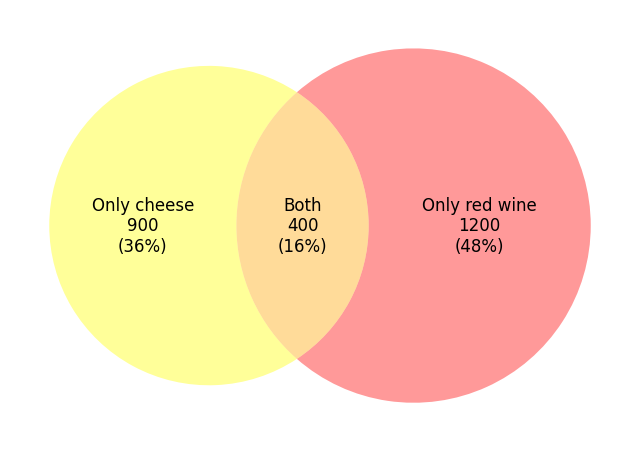

In [ ]:
# First way
plt.figure(figsize=(8, 11))

v2 = venn2(subsets = {'10': df.loc[0, 'NbClient'],
                      '01': df.loc[1, 'NbClient'],
                      '11': df.loc[2, 'NbClient']},
           set_labels=('', ''))
v2.get_patch_by_id('10').set_color('yellow')
v2.get_patch_by_id('01').set_color('red')
v2.get_patch_by_id('11').set_color('orange')

v2.get_patch_by_id('10').set_edgecolor('none')
v2.get_patch_by_id('01').set_edgecolor('none')
v2.get_patch_by_id('11').set_edgecolor('none')

v2.get_label_by_id('10').set_text('%s\n%d\n(%.0f%%)' % (df.loc[0, 'Product'],
                                                        df.loc[0, 'NbClient'],
                                                        np.divide(df.loc[0, 'NbClient'],
                                                                  df.NbClient.sum())*100))

v2.get_label_by_id('01').set_text('%s\n%d\n(%.0f%%)' % (df.loc[1, 'Product'],
                                                        df.loc[1, 'NbClient'],
                                                        np.divide(df.loc[1, 'NbClient'],
                                                                  df.NbClient.sum())*100))

v2.get_label_by_id('11').set_text('%s\n%d\n(%.0f%%)' % (df.loc[2, 'Product'],
                                                        df.loc[2, 'NbClient'],
                                                        np.divide(df.loc[2, 'NbClient'],
                                                                  df.NbClient.sum())*100))

for text in v2.subset_labels:
    text.set_fontsize(12)

plt.show()

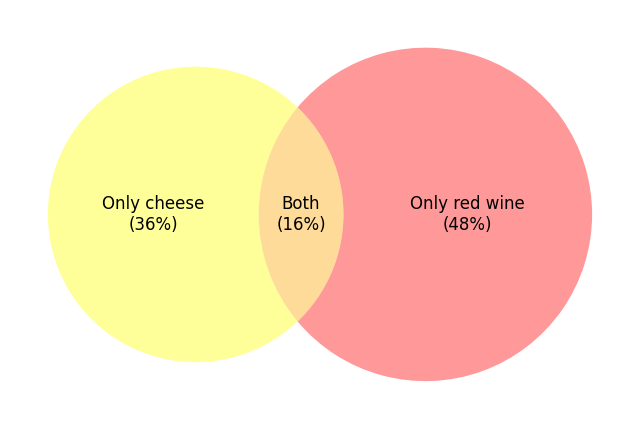

In [ ]:
# Second way
plt.figure(figsize=(8, 11))

grp1 = set(['cheese-a', 'cheese-b', 'cheese-c', 'cheese-d',
            'cheese-e', 'cheese-f', 'cheese-g', 'cheese-h',
            'cheese-i', 'cheese', 'red wine'])
grp2 = set(['red wine-a', 'red wine-b', 'red wine-c', 'red wine-d',
            'red wine-e', 'red wine-f', 'red wine-g', 'red wine-h',
            'red wine-i', 'red wine-j', 'red wine-k', 'red wine-l',
            'red wine', 'cheese'])

v2 = venn2([grp1, grp2], set_labels = ('', ''))

v2.get_patch_by_id('10').set_color('yellow')
v2.get_patch_by_id('01').set_color('red')
v2.get_patch_by_id('11').set_color('orange')

v2.get_patch_by_id('10').set_edgecolor('none')
v2.get_patch_by_id('01').set_edgecolor('none')
v2.get_patch_by_id('11').set_edgecolor('none')

v2.get_label_by_id('10').set_text('Only cheese\n(36%)')
v2.get_label_by_id('01').set_text('Only red wine\n(48%)')
v2.get_label_by_id('11').set_text('Both\n(16%)')

for text in v2.subset_labels:
    text.set_fontsize(12)

plt.show()

This kind of venn diagram can usually be used in retail trading. Assuming that we need to study the popularity of cheese and red wine, and 2500 clients answered our questionnaire. According to the diagram above, we find that among 2500 clients, 900 clients(36%) prefer cheese, 1200 clients(48%) prefer red wine, and 400 clients(16%) favor both product.

### Example 2

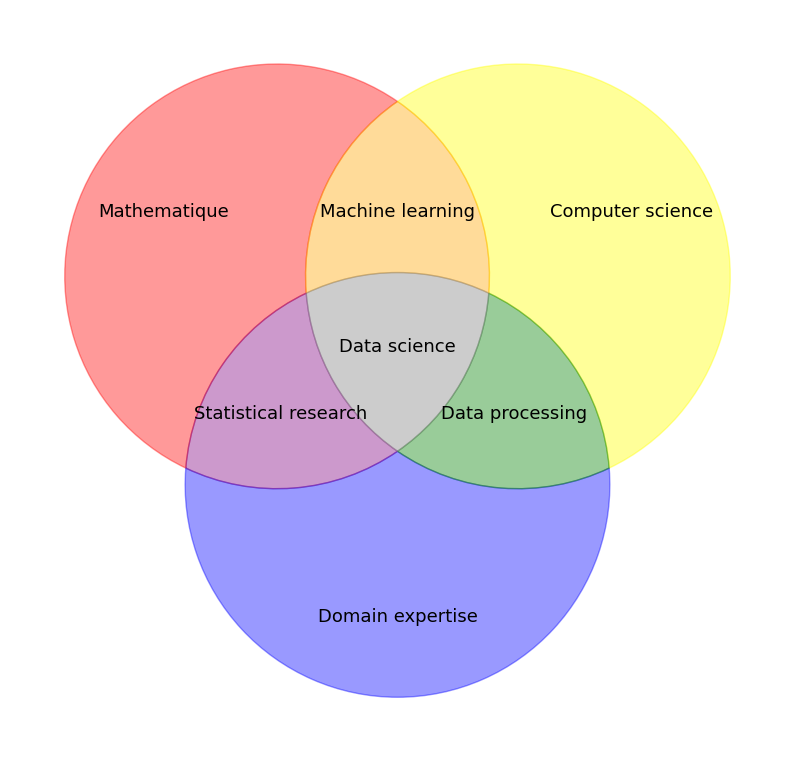

In [ ]:
from matplotlib_venn import venn3

plt.figure(figsize=(10, 10))
v3 = venn3(subsets = {'100':30, '010':30, '110':17,
                      '001':30, '101':17, '011':17, '111':5},
           set_labels = ('', '', ''))

v3.get_patch_by_id('100').set_color('red')
v3.get_patch_by_id('010').set_color('yellow')
v3.get_patch_by_id('001').set_color('blue')
v3.get_patch_by_id('110').set_color('orange')
v3.get_patch_by_id('101').set_color('purple')
v3.get_patch_by_id('011').set_color('green')
v3.get_patch_by_id('111').set_color('grey')

v3.get_label_by_id('100').set_text('Mathematique')
v3.get_label_by_id('010').set_text('Computer science')
v3.get_label_by_id('001').set_text('Domain expertise')
v3.get_label_by_id('110').set_text('Machine learning')
v3.get_label_by_id('101').set_text('Statistical research')
v3.get_label_by_id('011').set_text('Data processing')
v3.get_label_by_id('111').set_text('Data science')

for text in v3.subset_labels:
    text.set_fontsize(13)

plt.show()

I read an article and imitate its venn diagram as above, which presents differente ssential capacities for data science related workers.

# Data Viz with matplotlib Series 7: Area chart

## Reference
- Area chart
    <https://en.wikipedia.org/wiki/Area_chart>
- HOW TO DESIGN AREA CHARTS
    <https://visage.co/data-visualization-101-area-charts/>
- Stacked Area Graph
    <https://datavizcatalogue.com/methods/stacked_area_graph.html>
- 100% Stacked Area Chart
    <https://exceljet.net/chart-type/100-stacked-area-chart>

In [ ]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Area chart

An area chart or area graph displays graphically quantitative data. It is based on the line chart. The area between axis and line are commonly emphasized with colors, textures and hatchings.

### When to use it ?

- Show or compare a quantitative progression over time.

### Example 1

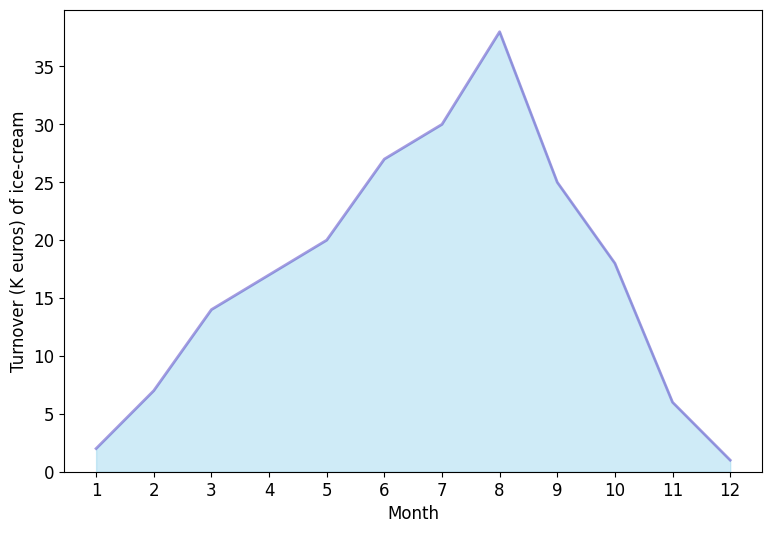

In [ ]:
plt.figure(figsize=(9, 6))

turnover = [2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]
plt.fill_between(np.arange(12), turnover, color="skyblue", alpha=0.4)
plt.plot(np.arange(12), turnover, color="Slateblue", alpha=0.6, linewidth=2)

plt.tick_params(labelsize=12)
plt.xticks(np.arange(12), np.arange(1,13))
plt.xlabel('Month', size=12)
plt.ylabel('Turnover (K euros) of ice-cream', size=12)
plt.ylim(bottom=0)

plt.show()

Suppose that the plot above describes the turnover(k euros) of ice-cream's sales during one year. According to the plot, we can clearly find that the sales reach a peak in summer, then fall from autumn to winter, which is logical.

### Example 2

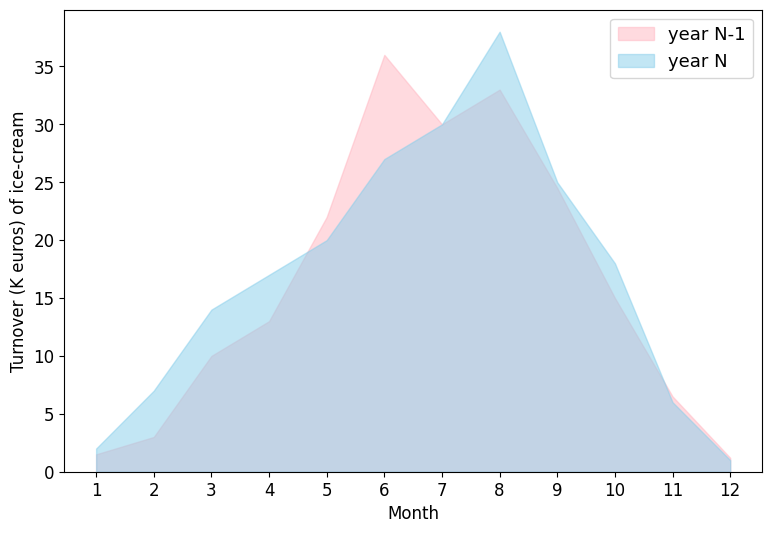

In [ ]:
plt.figure(figsize=(9, 6))

year_n_1 = [1.5, 3, 10, 13, 22, 36, 30, 33, 24.5, 15, 6.5, 1.2]
year_n = [2, 7, 14, 17, 20, 27, 30, 38, 25, 18, 6, 1]

plt.fill_between(np.arange(12), year_n_1, color="lightpink", alpha=0.5, label='year N-1')
plt.fill_between(np.arange(12), year_n, color="skyblue", alpha=0.5, label='year N')

plt.tick_params(labelsize=12)
plt.xticks(np.arange(12), np.arange(1,13))
plt.xlabel('Month', size=12)
plt.ylabel('Turnover (K euros) of ice-cream', size=12)
plt.ylim(bottom=0)
plt.legend()

plt.show()

As an extension of the first plot, the second one compares two-year turnover together. The peak for both year is in the summer, for year N, the peak is in August; however, the peak is reached in June in the year N-1, which is caused by the heatwave in June.

## Stacked area chart

Stacked Area Graphs work in the same way as simple Area Graphs do, except for the use of multiple data series that start each point from the point left by the previous data series.

### When to use it ?

- Represent cumulated totals using numbers or percentages over time.
- Visualize part-to-whole relationships, helping show how each category contributes to the cumulative total.

### Example

In [ ]:
bank_account_df = pd.DataFrame(
    {'basic':[3000, 1300, 2300, 1700, 1000, 2300, 1600],
     'saving':[10000, 10500, 11000, 11500, 12000, 12500, 13000],
     'money_mkt':[500, 700, 1200, 1700, 2000, 1200, 1700],
     'credit':[1000, 2000, 1000, 1000, 2000, 1000, 1000]},
    columns=['basic', 'saving', 'money_mkt', 'credit'],
    index=[datetime.date(2018, 5, 1), datetime.date(2018, 6, 1),
           datetime.date(2018, 7, 1), datetime.date(2018, 8, 1),
           datetime.date(2018, 9, 1), datetime.date(2018, 10, 1),
           datetime.date(2018, 11, 1)])

bank_account_df.index = pd.to_datetime(bank_account_df.index, format='%Y-%m-%d')
bank_account_df

,basic,saving,money_mkt,credit
2018-05-01,3000,10000,500,1000
2018-06-01,1300,10500,700,2000
2018-07-01,2300,11000,1200,1000
2018-08-01,1700,11500,1700,1000
2018-09-01,1000,12000,2000,2000
2018-10-01,2300,12500,1200,1000
2018-11-01,1600,13000,1700,1000


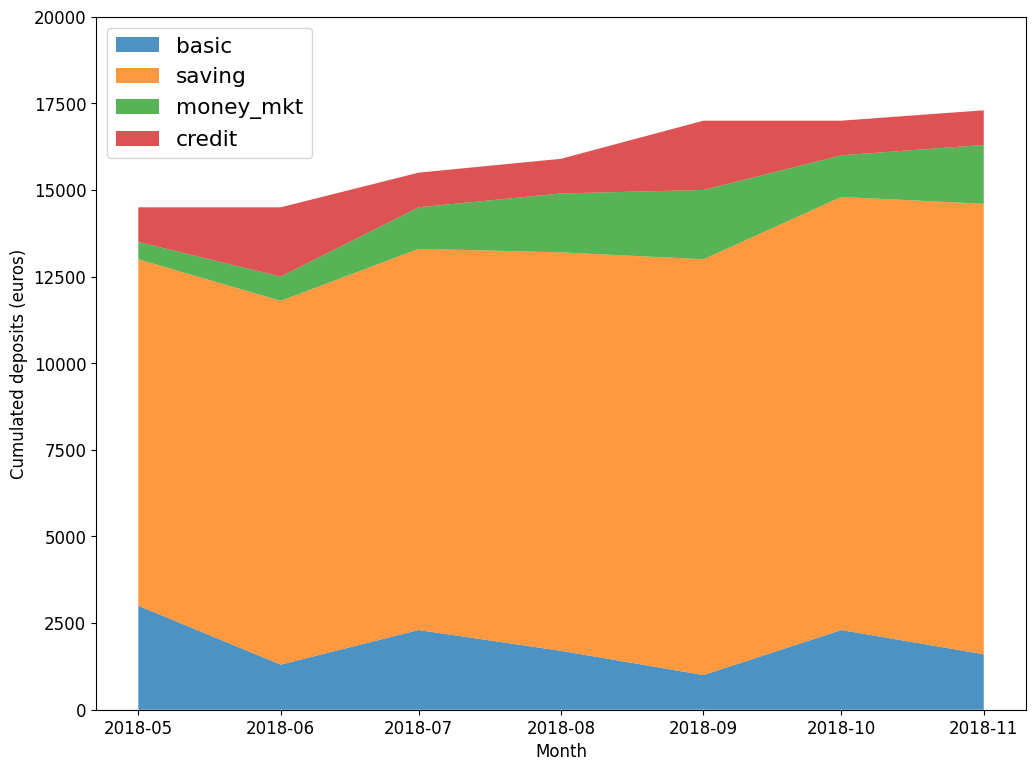

In [ ]:
plt.figure(figsize=(12, 9))

plt.stackplot(bank_account_df.index,
              [bank_account_df['basic'], bank_account_df['saving'],
               bank_account_df['money_mkt'], bank_account_df['credit']],
              labels=['basic', 'saving', 'money_mkt', 'credit'],
              alpha=0.8)

plt.tick_params(labelsize=12)
plt.xlabel('Month', size=12)
plt.ylabel('Cumulated deposits (euros)', size=12)
plt.ylim(bottom=0, top=20000)
plt.legend(loc=2, fontsize='large')

plt.show()

This stacked area chart displays the amounts' changes in each account, their contribution to total amount (in term of value) as well.

## 100% Stacked Area Chart

Data plotted as areas and stacked so that the cumulative area always represents 100%.

### When to use it ?

This is best used to show distribution of categories as parts of a whole, where the cumulative total is unimportant.

### Example

In [ ]:
data_perc = bank_account_df.divide(bank_account_df.sum(axis=1), axis=0)
data_perc

,basic,saving,money_mkt,credit
2018-05-01,0.206897,0.689655,0.034483,0.068966
2018-06-01,0.089655,0.724138,0.048276,0.137931
2018-07-01,0.148387,0.709677,0.077419,0.064516
2018-08-01,0.106918,0.723270,0.106918,0.062893
2018-09-01,0.058824,0.705882,0.117647,0.117647
2018-10-01,0.135294,0.735294,0.070588,0.058824
2018-11-01,0.092486,0.751445,0.098266,0.057803


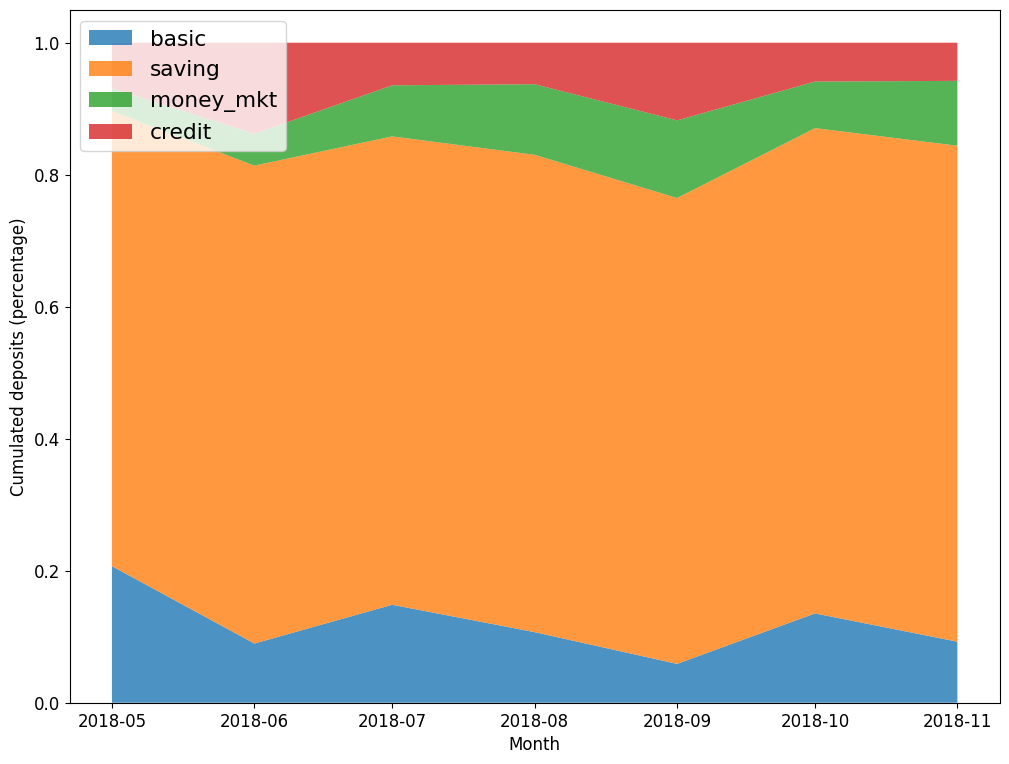

In [ ]:
plt.figure(figsize=(12, 9))

plt.stackplot(data_perc.index,
              [data_perc['basic'], data_perc['saving'],
               data_perc['money_mkt'], data_perc['credit']],
              labels=['basic', 'saving', 'money_mkt', 'credit'],
              alpha=0.8)
plt.tick_params(labelsize=12)
plt.xlabel('Month', size=12)
plt.ylabel('Cumulated deposits (percentage)', size=12)
plt.ylim(bottom=0)
plt.legend(loc=2, fontsize='large')

plt.show()

This stacked area chart displays the amounts' changes in each account, their contribution to total amount (in term of percentage) as well.

# Data Viz with matplotlib Series 8: Radar chart

## Reference
- radar chart
    <https://en.wikipedia.org/wiki/Radar_chart>
- Effective Use of Radar Charts
    <https://msktc.org/lib/docs/KT_Toolkit/Charts_and_Graphs/Charts_and_Graphics_Radar_508c.pdf>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

## Radar chart

The radar chart is a chart and/or plot that consists of a sequence of equi-angular spokes, called radii, with each spoke representing one of the variables. The data length of a spoke is proportional to the magnitude of the variable for the data point relative to the maximum magnitude of the variable across all data points. A line is drawn connecting the data values for each spoke. This gives the plot a star-like appearance and the origin of one of the popular names for this plot.

### When to use it ?

- Comparing two or more items or groups on various features or characteristics.
- Examining the relative values for a single data point.
- Displaying less than ten factors on one radar chart.
- Less than 8 items.

### Example 1

In [ ]:
df = pd.DataFrame({'client_id': ['c1','c2','c3','c4'],
                   'cheese': [2, 5, 4, 3],
                   'beer': [2, 1, 3, 5],
                   'chicken': [5, 3, 3, 4],
                   'bread': [4, 3, 2, 1],
                   'coffee': [2, 3, 5, 3]},
                  columns=['client_id', 'cheese', 'beer', 'chicken', 'bread', 'coffee'])
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
categories = list(df)[1:]

values = df.iloc[:, 1:].mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

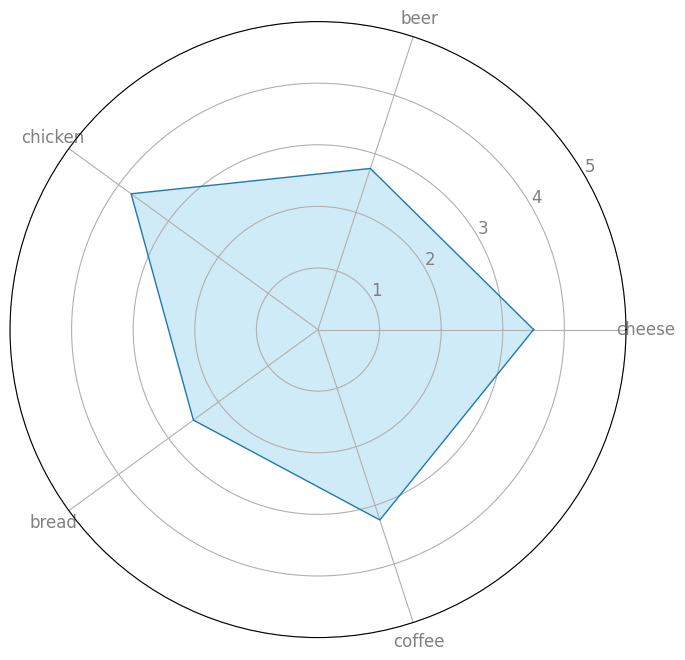

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'], color='grey', size=12)
plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)

plt.show()

This radar chart describes the average products' preference of 4 clients. Cheese is the most favored product, however, it seems that bread is not that popular... What're the products of bread? Do they taste bad? Should we change the supplier of bread? Or should we improve the recipe?

### Example 2

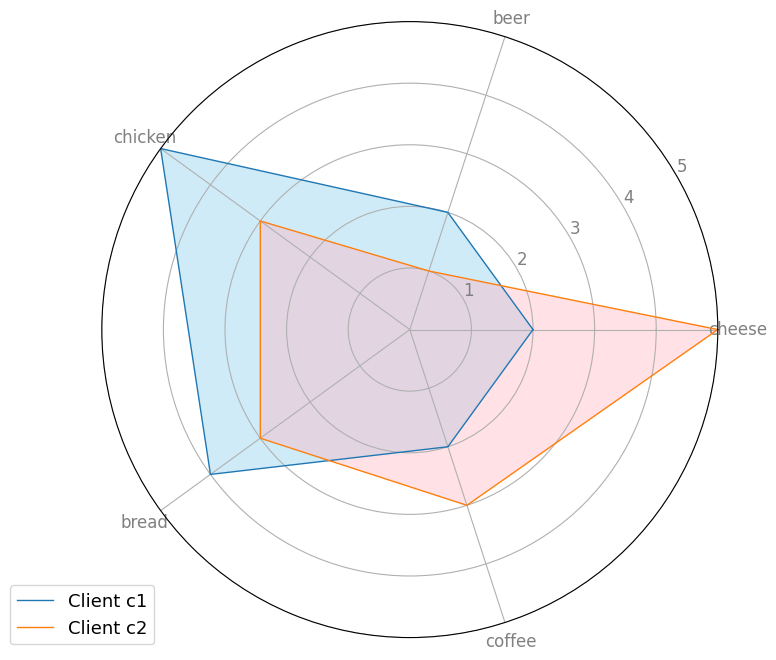

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'], color='grey', size=12)
plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1, linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1, linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

This radar chart displays the preference of 2 clients among 4. Client c1 favors chicken and bread, and doesn't like cheese that much. Nevertheless, client c2 prefers cheese to other 4 products and doesn't like beer. We can have an interview with these 2 clients, in order to find the weakness of products which are out of preference.

### Counter-example

In [ ]:
larger_df = pd.DataFrame({'client_id': ['c1','c2','c3','c4'],
                          'cheese': [2, 5, 4, 3],
                          'beer': [2, 1, 3, 5],
                          'chicken': [5, 3, 3, 4],
                          'bread': [4, 3, 2, 1],
                          'coffee': [2, 3, 5, 3],
                          'mochis': [5, 2, 4, 2],
                          'salad': [3, 2, 4, 3],
                          'sandwich': [2, 1, 3, 2],
                          'hotdog': [4, 3, 4, 2],
                          'soup': [4, 3, 2, 3],
                          'juice': [3, 2, 3, 3],
                          'fruit': [3, 4, 3, 5],
                          'hamburger': [3, 3, 4, 2]},
                         columns=['client_id', 'cheese', 'beer', 'chicken', 'bread',
                                  'coffee', 'mochis', 'salad', 'sandwich', 'hotdog',
                                  'soup', 'juice', 'fruit', 'hamburger'])
larger_df

,client_id,cheese,beer,chicken,bread,coffee,mochis,salad,sandwich,hotdog,soup,juice,fruit,hamburger
0,c1,2,2,5,4,2,5,3,2,4,4,3,3,3
1,c2,5,1,3,3,3,2,2,1,3,3,2,4,3
2,c3,4,3,3,2,5,4,4,3,4,2,3,3,4
3,c4,3,5,4,1,3,2,3,2,2,3,3,5,2


In [ ]:
larger_categories = list(larger_df)[1:]

larger_values = larger_df.loc[0].drop('client_id').values.flatten().tolist()
larger_values += larger_values[:1] # repeat the first value to close the circular graph

larger_angles = [n / float(len(larger_categories)) * 2 * pi for n in range(len(larger_categories))]
larger_angles += larger_angles[:1]

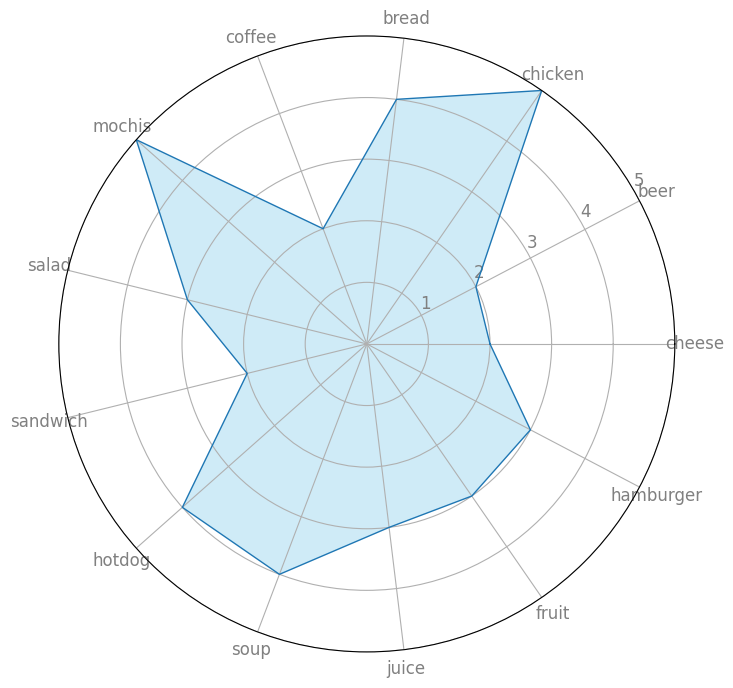

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(larger_angles[:-1], larger_categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'], color='grey', size=12)
plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(larger_angles, larger_values, linewidth=1, linestyle='solid')
ax.fill(larger_angles, larger_values, 'skyblue', alpha=0.4)

plt.show()

In this example, we have client c1's preferences on 13 food. Since the number of food is a bit more, which makes the preference not be obvious. That's why we'd better apply radar chart with less than 8 items.

# Data Viz with matplotlib Series 9: Word cloud

## Reference
- Tag cloud
    <https://en.wikipedia.org/wiki/Tag_cloud>
- Data science
    <https://en.wikipedia.org/wiki/Data_science>

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Word cloud

A word cloud (tag cloud, or weighted list in visual design) is a novelty visual representation of text data. Tags are usually single words, and the importance of each tag is shown with font size or color. This format is useful for quickly perceiving the most prominent terms and for locating a term alphabetically to determine its relative prominence.

### When to use it ?

- Depicting keyword metadata (tags) on websites.
- Delighting and provide emotional connection.

### Example 1: Basic word cloud

In [ ]:
text = ('Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured, similar to data mining. Data science is a concept to unify statistics, data analysis, machine learning and their related methods in order to understand and analyze actual phenomena with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a fourth paradigm of science (empirical, theoretical, computational and now data-driven) and asserted that everything about science is changing because of the impact of information technology and the data deluge. In 2012, when Harvard Business Review called it The Sexiest Job of the 21st Century, the term data science became a buzzword. It is now often used interchangeably with earlier concepts like business analytics, business intelligence, predictive modeling, and statistics. Even the suggestion that data science is sexy was paraphrasing Hans Rosling, featured in a 2011 BBC documentary with the quote, Statistics is now the sexiest subject around. Nate Silver referred to data science as a sexed up term for statistics. In many cases, earlier approaches and solutions are now simply rebranded as data science to be more attractive, which can cause the term to become dilute beyond usefulness. While many university programs now offer a data science degree, there exists no consensus on a definition or suitable curriculum contents. To its discredit, however, many data-science and big-data projects fail to deliver useful results, often as a result of poor management and utilization of resources')


In [ ]:
wordcloud = WordCloud(width=1280, height=853, margin=0, colormap='Blues').generate(text)

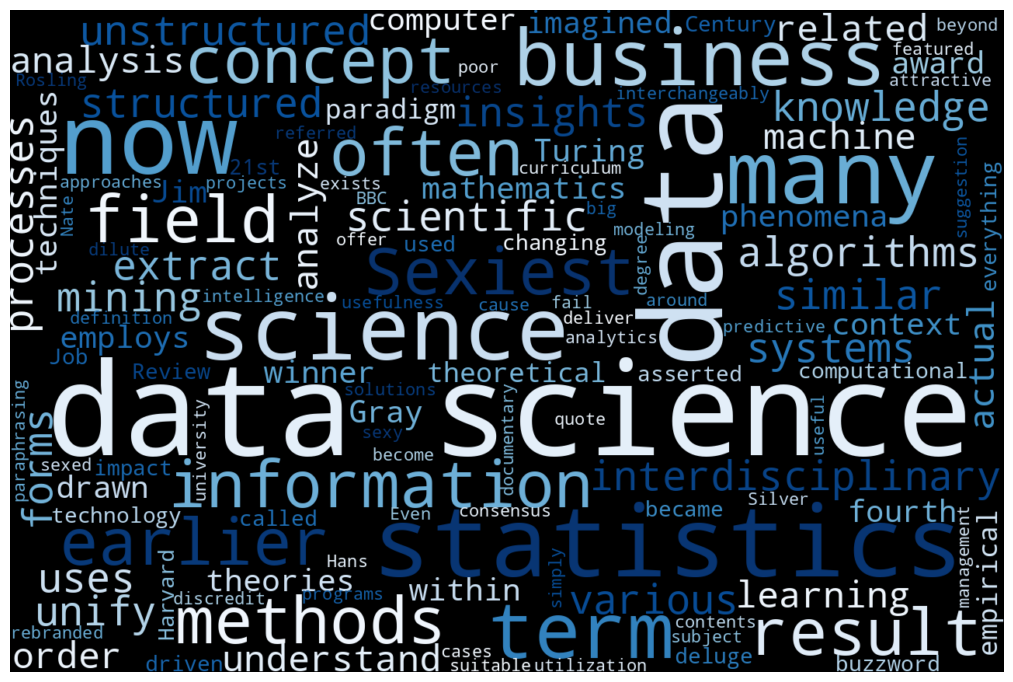

In [ ]:
plt.figure(figsize=(13, 8.6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

According to this word cloud, we can globally know that data science employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. It can be used for business analysis, and called "The Sexiest Job of the 21st Century".

### Example 2:  Word cloud with specific shape

In [ ]:
computer_mask = np.array(Image.open('/content/CSIT359/Module_6/computer_shape.jpg'))

In [ ]:
wordcloud_shape = WordCloud(width=1280, height=853, margin=0, colormap='BuPu', mask=computer_mask).generate(text)

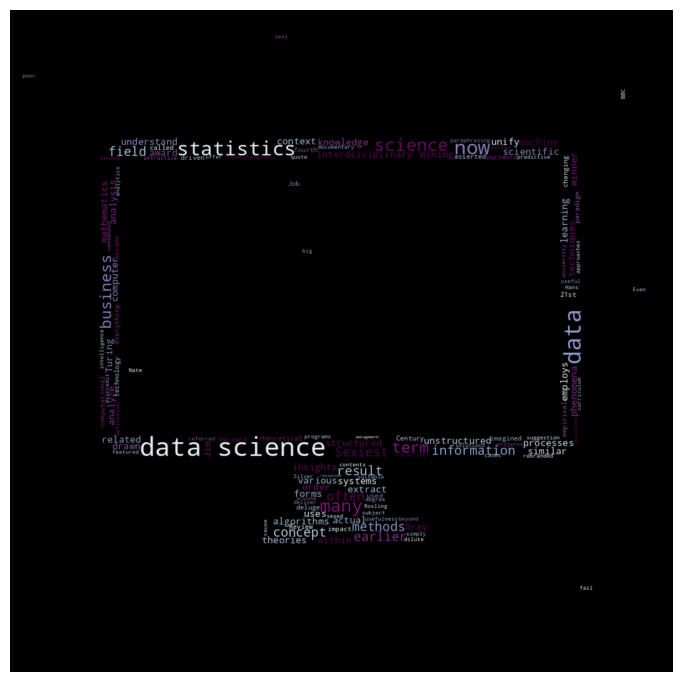

In [ ]:
plt.figure(figsize=(13, 8.6))
plt.imshow(wordcloud_shape, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Data Viz with matplotlib Series 10: Lollipop plot

## Reference
- Lollipop plot
    <https://python-graph-gallery.com/lollipop-plot/>

In [ ]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lollipop plot

A lollipop plot is an hybrid between a scatter plot and a barplot.

### When to use it ?

- Showing the relationship between a numerical variable and another numerical or categorical variable.

### Example 1

In [ ]:
df = pd.DataFrame({'Product':['Apple', 'Banana', 'Beer', 'Juice', 'Cheese',
                              'Coffee', 'Red wine', 'Hotdog'],
                   'Turnover':[30, 59, 92, 43, 123, 93, 103, 37]},
                  columns=['Product', 'Turnover'])
df

,Product,Turnover
0,Apple,30
1,Banana,59
2,Beer,92
3,Juice,43
4,Cheese,123
5,Coffee,93
6,Red wine,103
7,Hotdog,37


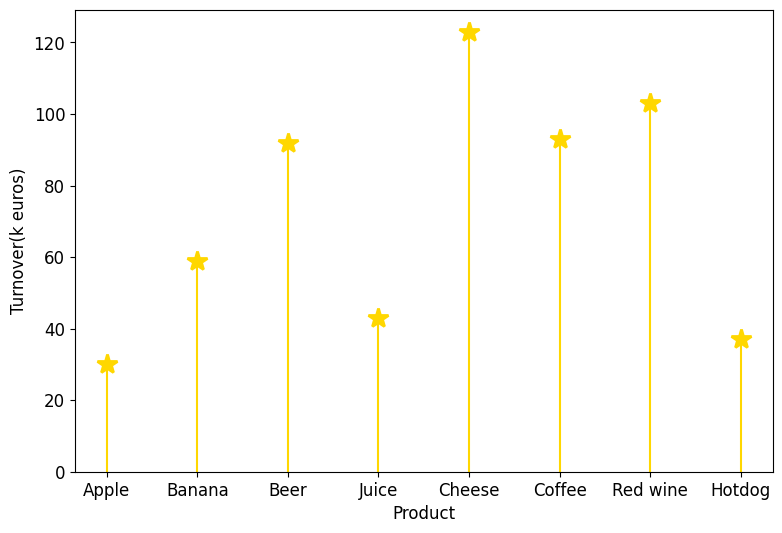

In [ ]:
plt.figure(figsize=(9, 6))

(markerline, stemlines, baseline) = plt.stem(df['Product'], df['Turnover'])
plt.setp(markerline, marker='*', markersize=15, markeredgewidth=2, color='gold')
plt.setp(stemlines, color='gold')
plt.setp(baseline, visible=False)

plt.tick_params(labelsize=12)
plt.xlabel('Product', size=12)
plt.ylabel('Turnover(k euros)', size=12)
plt.ylim(bottom=0)

plt.show()

This plot describes turnovers(k euros) for each product. Among eight products, cheese's sales bring the largest turnover (123k euros), however, it seems that consumers don't like apple that much.

### Example 2

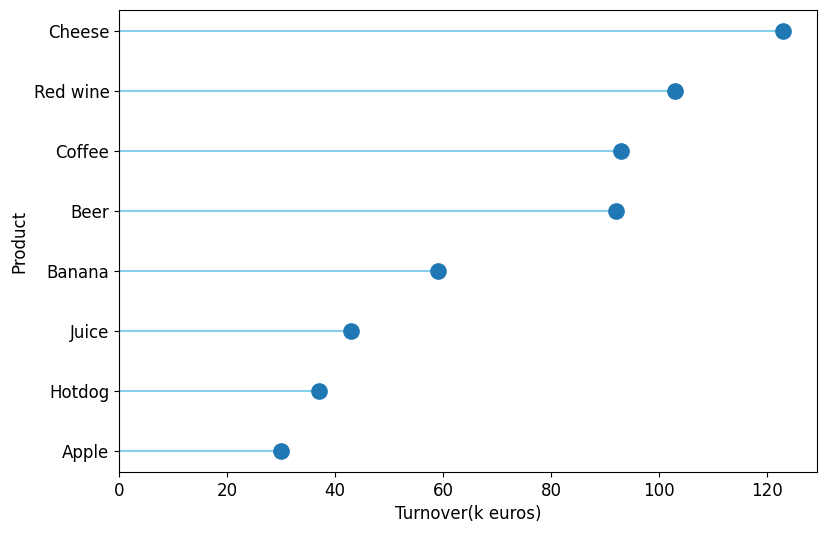

In [ ]:
ordered_df = df.sort_values(by='Turnover').reset_index(drop=True)
my_range = range(1, len(df.index) + 1)

plt.figure(figsize=(9, 6))

plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Turnover'], color='skyblue')
plt.plot(ordered_df['Turnover'], my_range, 'o', markersize=11)

plt.yticks(ordered_df.index+1, ordered_df['Product'])
plt.tick_params(labelsize=12)
plt.xlabel('Turnover(k euros)', size=12)
plt.ylabel('Product', size=12)
plt.xlim(left=0)

plt.show()

This vertical lollipop plot describes clearly turnover for each product. Obviously, cheese is prefered by clients.

# Data Viz with matplotlib Series 11: Histogram

## Reference
- Histogram
    <https://en.wikipedia.org/wiki/Histogram>

In [ ]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Histogram

A histogram is an accurate representation of the distribution of numerical data. It differs from a bar graph, in the sense that a bar graph relates two variables, but a histogram relates only one. To construct a histogram, the first step is to "bin" (or "bucket") the range of values-that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

### When to use it ?

- Estimating the probability distribution of a continuous variable (quantitative variable).
- Organizing large amounts of data, and producing a visualization quickly, using a single dimension.

In [ ]:
tickets = []
for i in range(1, 1931):
    ticket = 'T'+str(i)
    tickets.append(ticket)

In [ ]:
vol = [1] * 140 + [2] * 120 + [3] * 230 + [4] * 200 + [5] * 230 + \
[6] * 180 + [7] * 160 + [8] * 170 + [9] * 130 + [10] * 100 + [11] * 60 + \
[12] * 63 + [13] * 42 + [14] * 31 + [15] * 20 + [16] * 12 + [17] * 9 + [18] * 12 + [19] * 9 + [20] * 12

In [ ]:
len(vol)

1930

In [ ]:
df = pd.DataFrame({'TicketID': tickets,
                   'Volumes': vol},
                  columns=['TicketID', 'Volumes'])

In [ ]:
df.head()

,TicketID,Volumes
0,T1,1
1,T2,1
2,T3,1
3,T4,1
4,T5,1


In [ ]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.85])

,Volumes
count,1930.000000
mean,6.434197
std,3.883086
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
85%,10.000000
max,20.000000


### Basic histogram

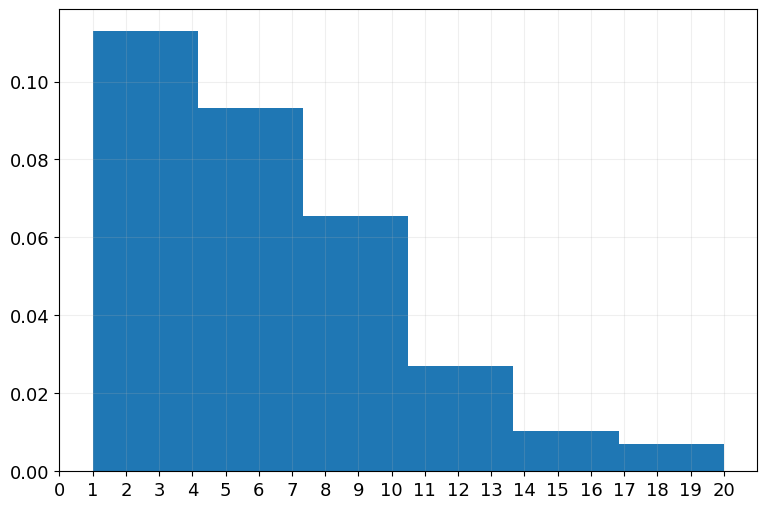

In [ ]:
plt.figure(figsize=(9, 6))

plt.hist(df['Volumes'], bins=6, density=True)
plt.xlim(left=0, right=21)
plt.xticks(np.arange(21))

plt.grid(alpha=0.2)
plt.show()

This plot describes that among 1930 tickets, 11% tickets contain less than 5 products; less than 1% tickets contain less than 21 products but more than 16 products. However, if we want to the percentage of tickets that contains less than or equal to 10 products, this basic histogram cannot satisfy our need in one second. In the following cumulative histogram, we can find the answer.

### Cumulative histogram
A cumulative histogram is a mapping that counts the cumulative number of observations in all of the bins up to the specified bin.

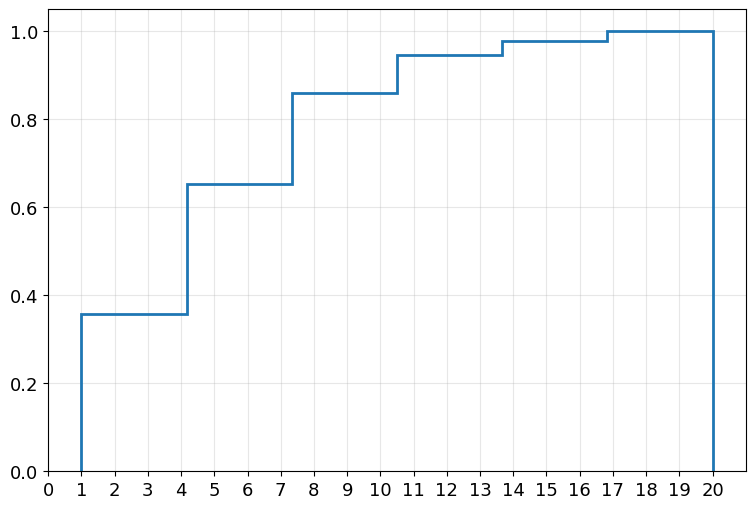

In [ ]:
plt.figure(figsize=(9, 6))

plt.hist(df['Volumes'], bins=6, density=True, cumulative=True, histtype='step', linewidth=2)
plt.xlim(left=0, right=21)
plt.xticks(np.arange(21))

plt.grid(alpha=0.3)
plt.show()

Considering the same question as above: what the percentage of tickets that contain less than or egale to 10 products? According to this cumulative histogram, the answer is obvious: nearly 85% tickets contain less than or egale to 10 products.

# Quiz
# Coding Question: Visualizing Market Share with Matplotlib Pie Charts

## Question:
Create a pie chart using matplotlib that visualizes the global smartphone market share data for Q4 2023.
The pie chart should:
1. Show the market share percentages for the top 5 smartphone vendors
2. Highlight (explode) the slice for the market leader
3. Include a title and legend
4. Display percentage values on each slice
5. Use a custom color palette

Here's the data to use:
- Samsung: 19.4%
- Apple: 17.8%
- Xiaomi: 12.5%
- OPPO: 8.7%
- vivo: 7.1%
- Others: 34.5%

In [ ]:
# Your answer here: